year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object
   year state    month  number       date
0  1998  Acre  Janeiro     0.0 1998-01-01
1  1999  Acre  Janeiro     0.0 1999-01-01
2  2000  Acre  Janeiro     0.0 2000-01-01
3  2001  Acre  Janeiro     0.0 2001-01-01
4  2002  Acre  Janeiro     0.0 2002-01-01
   year state    month  number       date
0  1998  Acre  Janeiro     0.0 1998-01-01
1  1999  Acre  Janeiro     0.0 1999-01-01
2  2000  Acre  Janeiro     0.0 2000-01-01
3  2001  Acre  Janeiro     0.0 2001-01-01
4  2002  Acre  Janeiro     0.0 2002-01-01
      year      state     month  number       date
6449  2012  Tocantins  Dezembro   128.0 2012-01-01
6450  2013  Tocantins  Dezembro    85.0 2013-01-01
6451  2014  Tocantins  Dezembro   223.0 2014-01-01
6452  2015  Tocantins  Dezembro   373.0 2015-01-01
6453  2016  Tocantins  Dezembro   119.0 2016-01-01
(6454, 5)
Number of Rows: 6454
Number of columns: 5

C:\Users\Admin\AppData\Local\Temp\ipykernel_11868\2700709192.py:25: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  result=df.drop_duplicates().any()


Axes(0.125,0.11;0.775x0.77)
               state     number
0               Acre  18464.030
1            Alagoas   4606.000
2              Amapa  21831.576
3           Amazonas  30650.129
4              Bahia  44746.226
5              Ceara  30428.063
6   Distrito Federal   3561.000
7     Espirito Santo   6546.000
8              Goias  37695.520
9           Maranhao  25129.131
10       Mato Grosso  96246.028
11      Minas Gerais  37475.258
12           Paraiba  52426.918
13              Pará  24512.144
14        Pernambuco  24498.000
15              Piau  37803.747
16               Rio  45094.865
17          Rondonia  20285.429
18           Roraima  24385.074
19    Santa Catarina  24359.852
20         Sao Paulo  51121.198
21           Sergipe   3237.000
22         Tocantins  33707.885
Axes(0.125,0.11;0.775x0.77)
30650.129
Axes(0.125,0.11;0.775x0.77)
date
0    1886.601
1    6474.217
2    3910.177
3    5754.802
4    5446.480
5    4162.666
6    3015.186
Name: number, dtype: float64
      

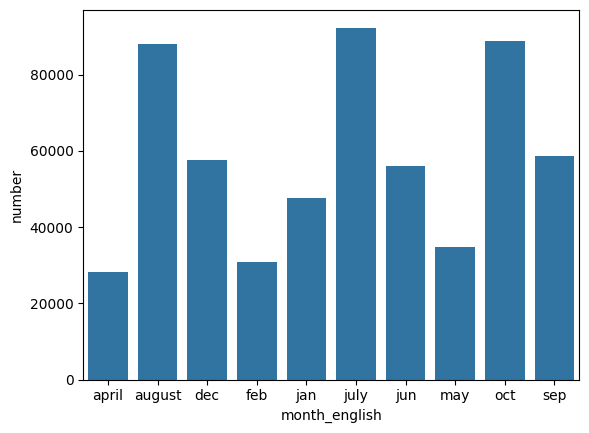

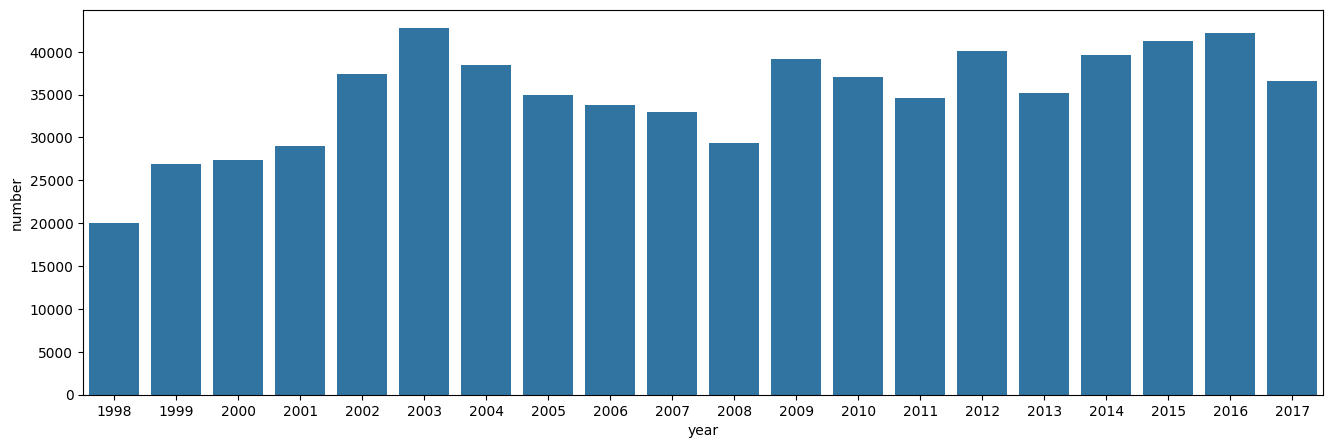

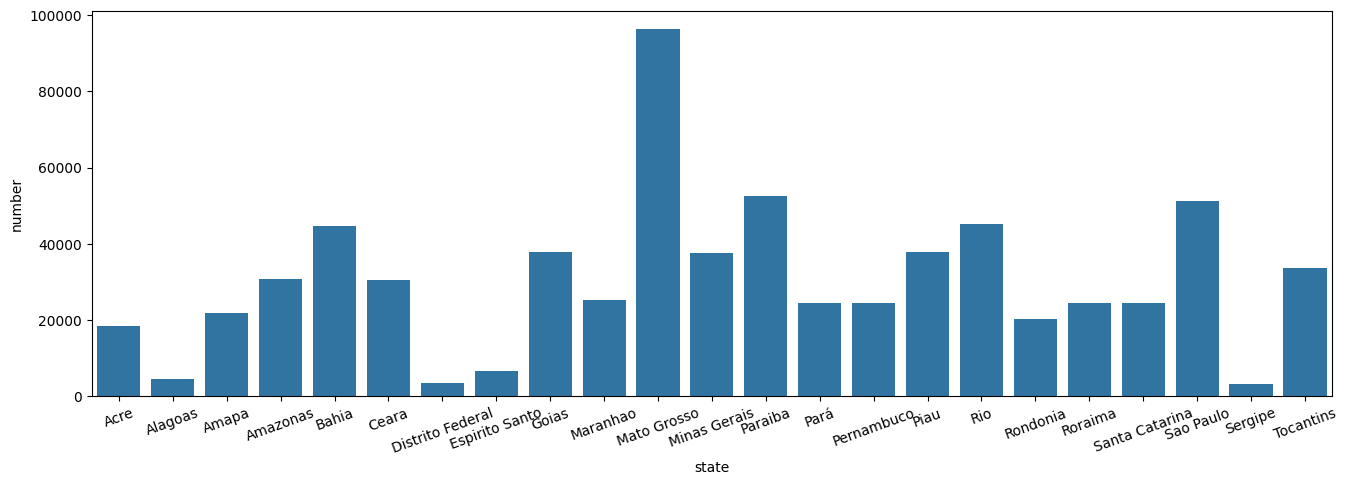

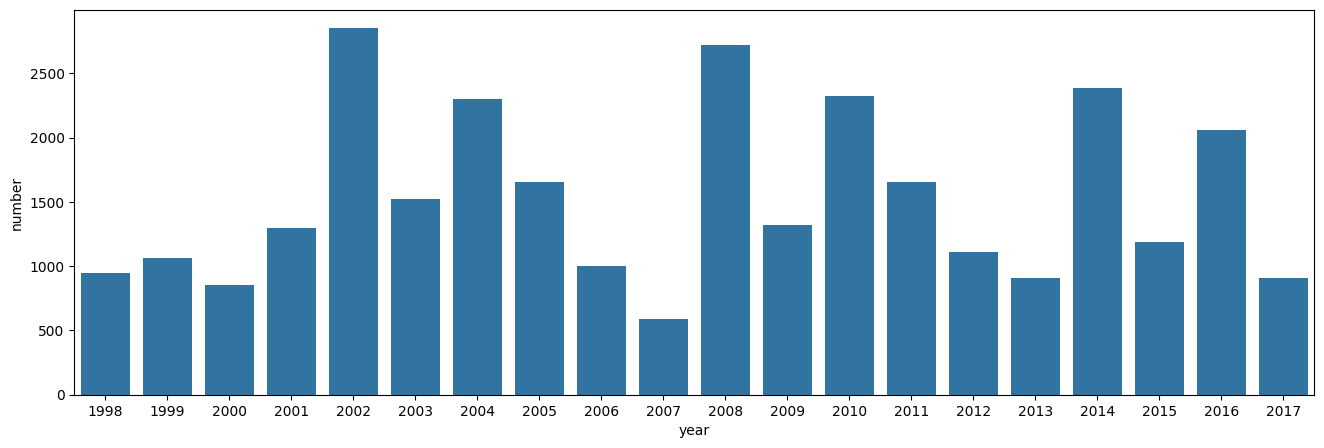

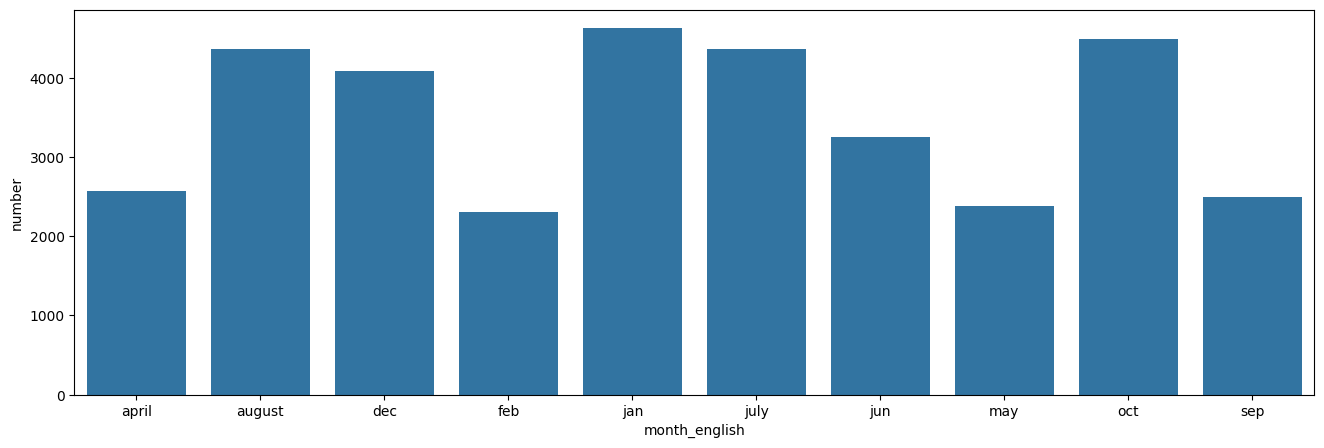

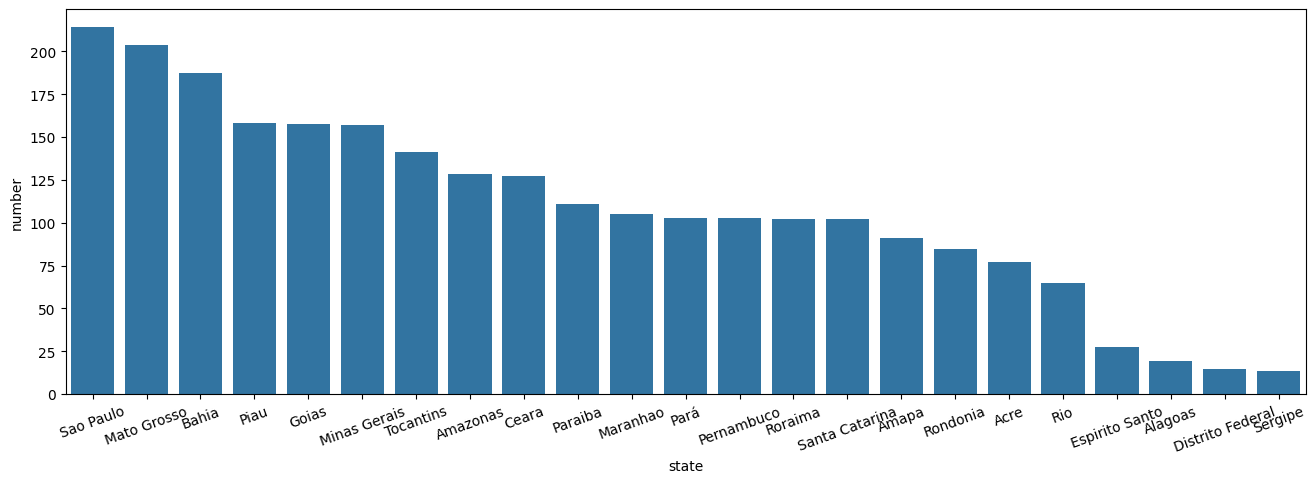

In [21]:
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt

# Reading data from csv file and modifiying dtype of date(object) to datetime 
df=pd.read_csv(r'C:\users\Admin\Downloads\archive\amazon.csv',encoding='iso-8859-1',parse_dates=['date'])
print(df.dtypes)

#Diplay top 5 rows of dataset
print(df.head()) 
print(df.iloc[:5,])

#Display last 5 rows of dataset
print(df.tail())

#Find shape of datset
print(df.shape)
print(f'Number of Rows: {df.shape[0]}') 
print(f'Number of columns: {df.shape[1]}')

#Getting info about datset like total number of rows,total number of coluns,datatypes of each column and memory requirement
print(df.info())

#Check for duplicate data and drop them
result=df.drop_duplicates().any()
print(f'Are there is any duplicates in dataset: {result}')

df=df.drop_duplicates()
print(df.shape)

#Check null values in dataset
print(df.isna().sum())

#Get overall statistics about datframe .Bydefault it will only show stats for numeric values only
print(df.describe(include='all'))

#Rename month names to english language
df['month_english']=df['month'].map({'Janeiro' :'jan'
                                     ,'Fevereiro':'feb'
                                     ,'Marco':'march'
                                     ,'Abril':'april'
                                     ,'Maio':'may'
                                     ,'Junho':'jun'
                                     ,'Julho':'july'
                                     ,'Agosto':'august'
                                     ,'Setembro':'sep'
                                     ,'Outubro':'oct'
                                     ,'Novermbro':'nov'
                                     ,'Dezembro':'dec'})
print(df.head())

#In which month maximum number of forest fires were reported
result=df.groupby('month_english')['number'].sum().reset_index()
print(result)
#bar chart using seaborn lab
print(se.barplot(data=result,x='month_english',y='number'))

#In which year maximum number of forest fires were reported

result1=df.groupby('year').agg({'number':'sum'}).reset_index()
print(result1)
plt.figure(figsize=(16,5))
print(se.barplot(data=result1,x='year',y='number'))

#In which state maximum number of forest fires were reported
result3=df.groupby('state').agg({'number':'sum'}).reset_index()
print(result3)
plt.figure(figsize=(16,5))
plt.xticks(rotation=20)
print(se.barplot(data=result3,x='state',y='number'))

#Total number of fires were reported in amazonas
print(df[df['state']=='Amazonas']['number'].sum())

#Display number of fires were reported in amzonas year wise
result4=df[df['state']=='Amazonas'].groupby('year')['number'].sum().reset_index()
plt.figure(figsize=(16,5))
print(se.barplot(data=result4,x='year',y='number'))

#Display number of fires were reported in amzonas day wise
df['date']=pd.to_datetime(df['date'])
result5=df[df['state']=='Amazonas'].groupby(df['date'].dt.dayofweek)['number'].sum()
print(result5)
#convert numeric days 
import calendar 
result5.index=[calendar.day_name[x] for x in range(0,7)]   #changiing numeric index to words
print(result5.reset_index())

#Find total numbers of fires were reported in 2015 and visualize data based on each month
fire=df[df['year']==2015].groupby('month_english').agg({'number':'sum'}).reset_index()
print(fire)
plt.figure(figsize=(16,5))
print(se.barplot(data=fire,x='month_english',y='number'))

#Find average number of fires were reported from highest to lowest (state_wise)

fire1=df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
print(fire1)
plt.figure(figsize=(16,5))
plt.xticks(rotation=20)
print(se.barplot(data=fire1,x='state',y='number'))


#Find state names where fires were reported in dec month
fire3=df[df['month']=='dec']['state'].unique()
print(fire3)